In [1]:
#ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.decomposition
from sklearn.cluster import KMeans
from sklearn import metrics
from datetime import timedelta, date
import requests
import random
import statistics

In [3]:
#get the dates
def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)

In [4]:
start_dt = date(2022,3,1)
end_dt = date(2022,9,13)
weekdays = [6,7]
dates = []
for dt in daterange(start_dt, end_dt):
    if dt.isoweekday() not in weekdays:
        dates.append(dt.strftime("%Y-%m-%d"))

In [5]:
#dictionary of months to extract it from url
month = {
    '01' : 'Januar',
    '02' : 'Februar',
    '03' : 'Maerz',
    '04' :  'April',
    '05' : 'Mai',
    '06': 'Juni',
    '07': 'Juli',
    '08' : 'August',
    '09' : 'September',
    '10' : 'Oktober',
    '11' : 'November',
    '12' : 'Dezember'
}

In [6]:
#getting datasets from web
datasets = []
for i in dates:
    if(requests.get('https://lua.rlp.de/fileadmin/lua/Downloads/Corona/Rohdaten_'+month[i[5:7]]+'_'+i[:4]+'/Corona-Fallmeldungen-RLP-'+i+'.xlsx').status_code==200):
        data = pd.read_excel('https://lua.rlp.de/fileadmin/lua/Downloads/Corona/Rohdaten_'+month[i[5:7]]+'_'+i[:4]+'/Corona-Fallmeldungen-RLP-'+i+'.xlsx')
        data = data.iloc[: , :-3]
        data = data.iloc[:-1,:]
        datasets.append(data)

In [7]:
datasets[16]

,"Kreis, Stand 23.3.2022","Laborbestätigt, seit Beginn der Pandemie",Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Neue Meldefälle,Unnamed: 8,Inzidenz der letzten 7-Tage pro 100.000C,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,Gesamt,Differenz zum,Hospitalisiert,Verstorben,GenesenA,aktuelle FälleB,Letzte,Gleicher Zeitraum Vorwoche,Rheinland-Pfalz,+USAFD,<20 Jahre,20-59 JahreE,≥ 60 Jahre
1,NaN,NaN,Vortag,NaN,NaN,NaN,NaN,7 Tage,NaN,NaN,NaN,NaN,NaN,NaN
2,Ahrweiler,23368,376,385,89,16253,7026,2217,2101,1699.1,1699.1,2327.9,2065.2,810.2
3,Altenkirchen,22999,241,712,127,16925,5947,1668,1764,1292.2,1292.2,1685.7,1543.9,632.2
4,Alzey-Worms,24578,545,688,173,18054,6351,2184,1680,1670.8,1670.4,2361.6,1864.2,860
5,Bad Dürkheim,23760,556,611,201,17264,6295,2520,1690,1894.7,1894.3,2808.3,2076.2,1138.6
6,Bad Kreuznach,33125,624,432,160,23127,9838,3079,3372,1939.6,1939.4,2707.2,2231.9,1029.9
7,Bernkastel-Wittlich,19556,524,543,91,13249,6216,1847,1794,1639.1,1615.7,2255.3,1933.3,805.9
8,Birkenfeld,15974,219,512,142,11618,4214,1422,1400,1759.2,1707.7,2633.4,2195.8,634.1
9,Bitburg-Prüm,18455,436,321,50,12705,5700,1498,1621,1497.2,1450.3,2104.8,1683.2,760.9


In [8]:
l = ['City','Total','Difference To Last Day','Hospitalized','Deceased','Recovered','Current','New Cases Last 7 Days','Same Period Last week','7 Day Incidence Rhineland','7 Day Incidence +USAF','7 Day Incidence <20yr','20-59yr','>60yr']
for i in range(len(datasets)):
    datasets[i] = datasets[i].iloc[2:,:]
    for j,col in zip(l,datasets[i].columns):
        datasets[i].rename(columns={col:j},inplace=True)
    
    datasets[i] = datasets[i].set_index('City')

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [9]:
for i in range(len(datasets)):
    datasets[i]=datasets[i].dropna()
    datasets[i] = datasets[i][datasets[i].index.notnull()]

In [10]:
pop = pd.read_csv('pop.csv')
pop = pop.iloc[:-1,:]
for i in datasets:
    i['Population'] = pop['Population'].values
print(len(dates))

141


In [11]:
#for i in range(len(datasets)):
    #if(len(datasets[i])==len(datasets[i+1])):
        #print("True") 
    #else:
        #print("False")

In [12]:
datasets[16]

,Total,Difference To Last Day,Hospitalized,Deceased,Recovered,Current,New Cases Last 7 Days,Same Period Last week,7 Day Incidence Rhineland,7 Day Incidence +USAF,7 Day Incidence <20yr,20-59yr,>60yr,Population
City,,,,,,,,,,,,,,
Ahrweiler,23368,376,385,89,16253,7026,2217,2101,1699.1,1699.1,2327.9,2065.2,810.2,128146.0
Altenkirchen,22999,241,712,127,16925,5947,1668,1764,1292.2,1292.2,1685.7,1543.9,632.2,129261.0
Alzey-Worms,24578,545,688,173,18054,6351,2184,1680,1670.8,1670.4,2361.6,1864.2,860,131330.0
Bad Dürkheim,23760,556,611,201,17264,6295,2520,1690,1894.7,1894.3,2808.3,2076.2,1138.6,133206.0
Bad Kreuznach,33125,624,432,160,23127,9838,3079,3372,1939.6,1939.4,2707.2,2231.9,1029.9,159402.0
Bernkastel-Wittlich,19556,524,543,91,13249,6216,1847,1794,1639.1,1615.7,2255.3,1933.3,805.9,113194.0
Birkenfeld,15974,219,512,142,11618,4214,1422,1400,1759.2,1707.7,2633.4,2195.8,634.1,80849.0
Bitburg-Prüm,18455,436,321,50,12705,5700,1498,1621,1497.2,1450.3,2104.8,1683.2,760.9,100959.0
Cochem-Zell,11634,319,217,88,7267,4279,1321,1279,2145.2,2143.6,2965.9,2512.9,1173.6,61735.0


In [13]:
#min max scaling
scaled = []
for i in datasets:
    for column in i:
        i[column] = (i[column] - i[column].min()) / (i[column].max() - i[column].min())
    scaled.append(i)

In [14]:
#feature scaling
features = []
for i in scaled:
    sklearn_pca = sklearn.decomposition.PCA(n_components=3)
    sklearn_pca.fit(i[i.columns])
    df= pd.DataFrame(sklearn_pca.transform(i[i.columns]),index=i.index,
                     columns=['PCA1', 'PCA2','PCA3'])
    features.append(df)

In [15]:
#clustering
cluster = []
for i in features:
    kmeans = KMeans(n_clusters=3, random_state=0).fit(i)
    cluster.append(kmeans)

In [16]:
for i in range(len(features)):
    features[i]['Cluster'] = cluster[i].labels_
    datasets[i]['Cluster'] = cluster[i].labels_

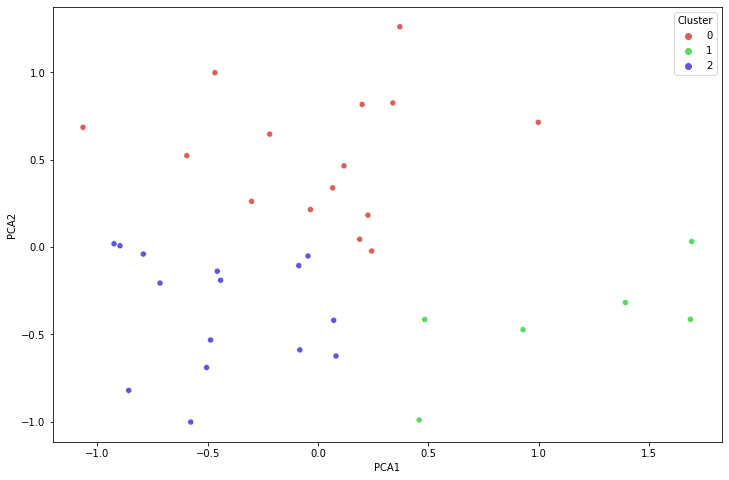

In [17]:
#Plotting PCAs
plt.figure(figsize=(12, 8))
i = random.randrange(len(features))
sns.scatterplot(features[i]["PCA1"], features[i]["PCA2"], hue=features[i]['Cluster'],palette=sns.color_palette('hls', 3))
#plt.savefig('PCA.jpg')
plt.show()

In [18]:
#Evaluating kmeans 
kSil = []
kCH = []
kDB = []
for i in range(len(features)):
    kSil.append(metrics.silhouette_score(features[i], cluster[i].labels_))
    kCH.append(metrics.calinski_harabasz_score(features[i], cluster[i].labels_))
    kDB.append(metrics.davies_bouldin_score(features[i], cluster[i].labels_))
print(statistics.mean(kSil))
print(statistics.mean(kCH))
print(statistics.mean(kDB))

0.5663771850330184
59.56647167464769
0.6328052902145384


In [19]:
for i in range(len(datasets)):
    datasets[i]['date'] = dates[i]
    datasets[i]['date'] = pd.to_datetime(datasets[i]['date'])

In [20]:
datasets[3]

,Total,Difference To Last Day,Hospitalized,Deceased,Recovered,Current,New Cases Last 7 Days,Same Period Last week,7 Day Incidence Rhineland,7 Day Incidence +USAF,7 Day Incidence <20yr,20-59yr,>60yr,Population,Cluster,date
City,,,,,,,,,,,,,,,,
Ahrweiler,0.393526,0.460177,0.240135,0.187831,0.37931,0.496147,0.6138,0.501976,0.603505,0.60412,0.778907,0.673079,0.321238,0.512659,1,2022-03-04
Altenkirchen,0.412289,0.447788,0.582864,0.283069,0.393622,0.523917,0.45999,0.676454,0.337818,0.338162,0.488069,0.379558,0.162026,0.518737,1,2022-03-04
Alzey-Worms,0.451337,0.40708,0.520857,0.410053,0.438708,0.534281,0.51701,0.565217,0.426116,0.426324,0.700398,0.350081,0.279769,0.530014,1,2022-03-04
Bad Dürkheim,0.407661,0.59115,0.456595,0.484127,0.36775,0.580255,0.618112,0.61773,0.583946,0.584201,0.788776,0.619389,0.364781,0.540239,1,2022-03-04
Bad Kreuznach,0.613588,0.6,0.282976,0.383598,0.641738,0.552883,0.823191,0.74026,0.659695,0.66014,0.990131,0.643315,0.308353,0.683024,1,2022-03-04
Bernkastel-Wittlich,0.304122,0.463717,0.393461,0.201058,0.275503,0.459075,0.525635,0.550536,0.644997,0.624604,0.844823,0.706288,0.249704,0.431161,1,2022-03-04
Birkenfeld,0.223882,0.079646,0.394589,0.28836,0.264182,0.149216,0.158122,0.110672,0.153081,0.124491,0.208352,0.208728,0.22734,0.254861,0,2022-03-04
Bitburg-Prüm,0.267746,0.500885,0.147689,0.092593,0.262667,0.351714,0.339722,0.35799,0.392651,0.354799,0.422227,0.521868,0.018365,0.364473,1,2022-03-04
Cochem-Zell,0.099313,0.176991,0.060879,0.193122,0.099701,0.169413,0.238141,0.151327,0.766648,0.766184,0.956768,0.878457,0.328051,0.150677,0,2022-03-04


In [21]:
#merging datasets
merge = pd.concat(datasets)

In [22]:
#group by cities
grouped = merge.groupby("City")

In [23]:
#group by clusters
#zero = set(merge.groupby("Cluster").get_group(0).index)
#one = set(merge.groupby("Cluster").get_group(1).index)
#two =set(merge.groupby("Cluster").get_group(2).index)
#print(len(zero))
#print(len(one))
#print(len(two))

In [24]:
#grouped.get_group("Kaiserslautern")['Cluster'].value_counts().idxmax()
grouped.get_group("Ahrweiler")['Cluster'].value_counts()

0    77
1    41
2    20
Name: Cluster, dtype: int64

In [25]:
d = {}
for name, group in merge.groupby('City'):
    d[str(name)] = group

In [26]:
for i in d.keys():
    d[i]['Cluster'] = d[i]['Cluster'].value_counts().idxmax()

In [27]:
#for i,j in zip(dates,datasets):
    #j['date'] = i
    #j['date'] = pd.to_datetime(j['date'])
#pd.concat(d, axis=1).sum(axis=1, level=0)

In [28]:
dfs = []
for i in d.keys():
    dfs.append(pd.DataFrame(d[i]))

In [29]:
mrg = pd.concat(dfs)

In [30]:
mrg['Total'].value_counts().idxmax()

1.0

In [31]:
mrg.tail()

,Total,Difference To Last Day,Hospitalized,Deceased,Recovered,Current,New Cases Last 7 Days,Same Period Last week,7 Day Incidence Rhineland,7 Day Incidence +USAF,7 Day Incidence <20yr,20-59yr,>60yr,Population,Cluster,date
City,,,,,,,,,,,,,,,,
Westerwaldkreis,0.860343,0.657718,1.0,0.514286,0.867541,0.496712,0.680882,0.772887,0.612563,0.61308,0.781467,0.606515,0.612835,0.92519,1,2022-09-02
Westerwaldkreis,0.86051,0.768116,1.0,0.511848,0.867926,0.489295,0.720695,0.727273,0.717068,0.717576,0.799286,0.693853,0.631489,0.92519,1,2022-09-05
Westerwaldkreis,0.860204,0.166259,1.0,0.511848,0.867946,0.466547,0.671622,0.760135,0.354152,0.354152,0.488556,0.282481,0.406726,0.92519,1,2022-09-06
Westerwaldkreis,0.859816,0.615819,1.0,0.517986,0.865772,0.481113,0.695716,0.671875,0.24854,0.24854,0.358833,0.196516,0.484633,0.92519,1,2022-09-07
Westerwaldkreis,0.861535,1.0,1.0,0.516746,0.865786,0.533793,0.818731,0.682443,0.247448,0.251372,0.293704,0.215444,0.457973,0.92519,1,2022-09-08


In [32]:
zero = set(mrg.groupby("Cluster").get_group(0).index)
one = set(mrg.groupby("Cluster").get_group(1).index)
two =set(mrg.groupby("Cluster").get_group(2).index)
print(len(zero))
print(len(one))
print(len(two))

19
15
2


In [33]:
grp = mrg.groupby("City")


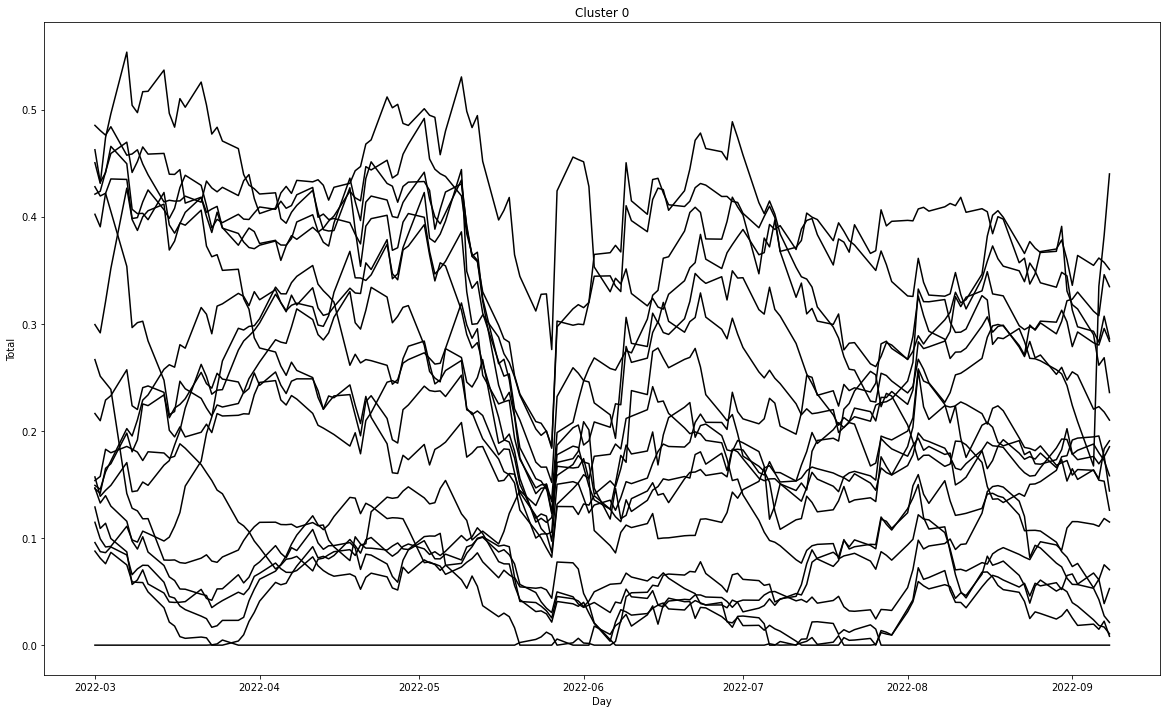

In [34]:
plt.figure(figsize=(20, 12))
for i in zero:
    plt.plot(grp.get_group(i)['date'], grp.get_group(i)['Current'],color='black')
    plt.xlabel('Day')
    plt.ylabel('Total')
    plt.title("Cluster 0")
    plt.savefig("CCluster0.jpg")

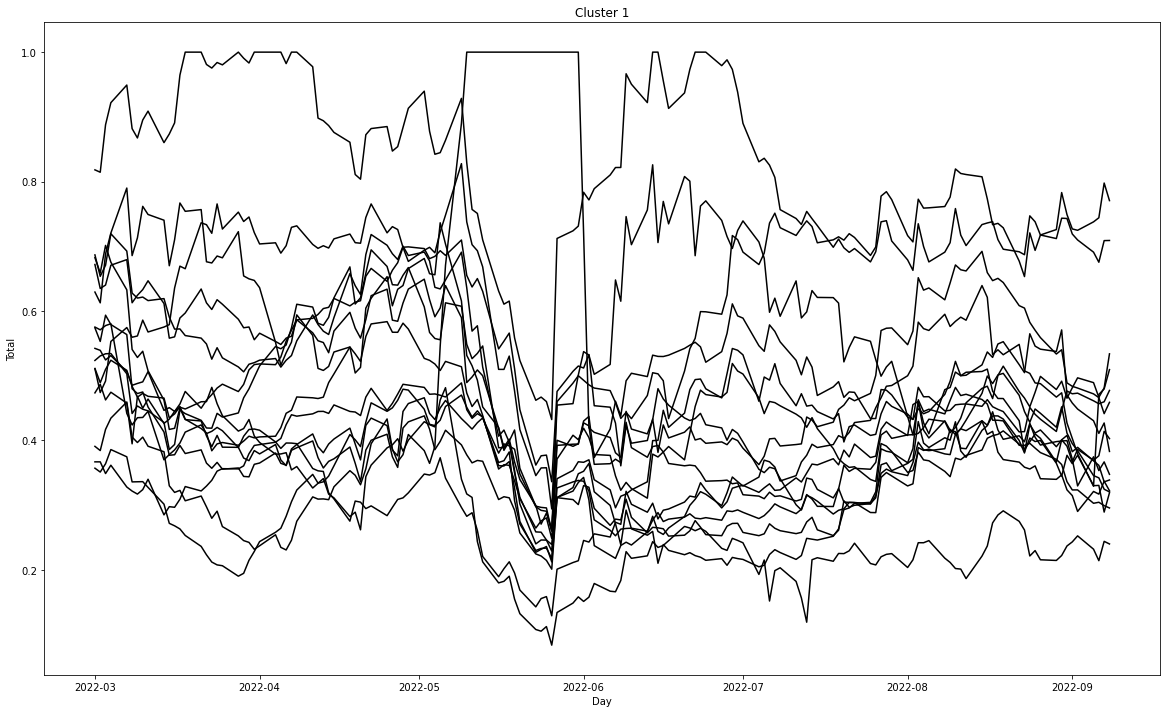

In [35]:
plt.figure(figsize=(20, 12))
for i in one:
    plt.plot(grp.get_group(i)['date'], grp.get_group(i)['Current'],color='black')
    plt.xlabel('Day')
    plt.ylabel('Total')
    plt.title("Cluster 1")
    plt.savefig("CCluster1.jpg")

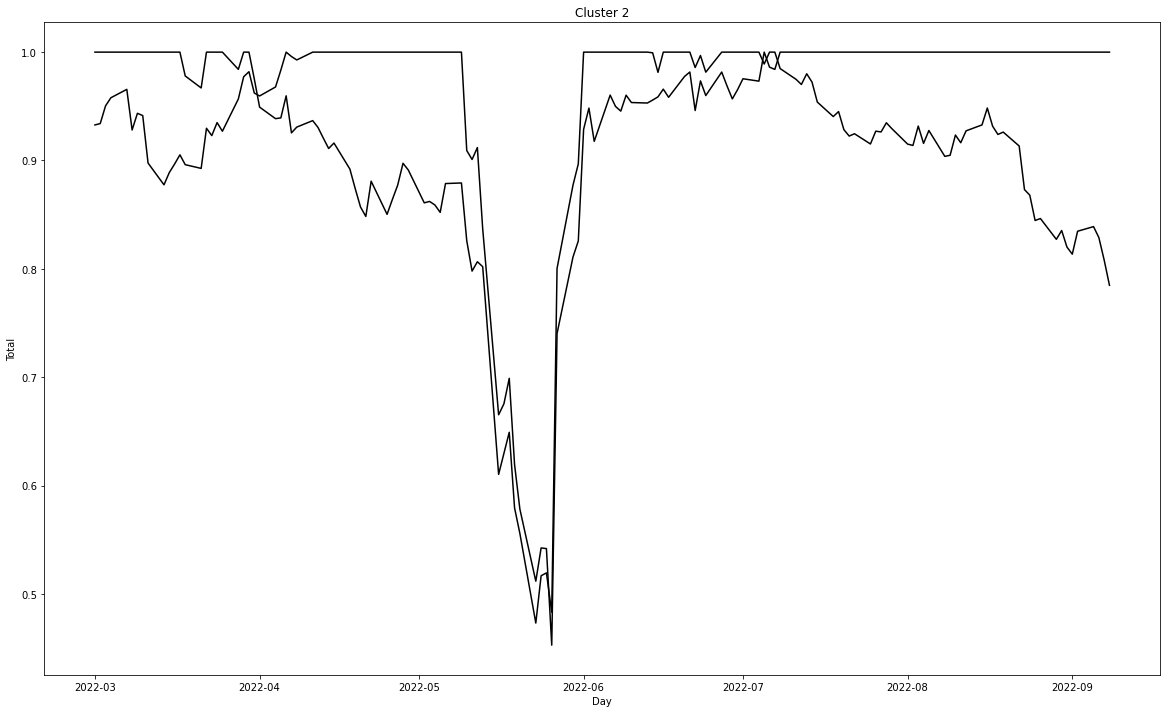

In [36]:
plt.figure(figsize=(20, 12))
for i in two:
    plt.plot(grp.get_group(i)['date'], grp.get_group(i)['Current'],color='black')
    plt.xlabel('Day')
    plt.ylabel('Total')
    plt.title("Cluster 2")
    plt.savefig("CCluster2.jpg")

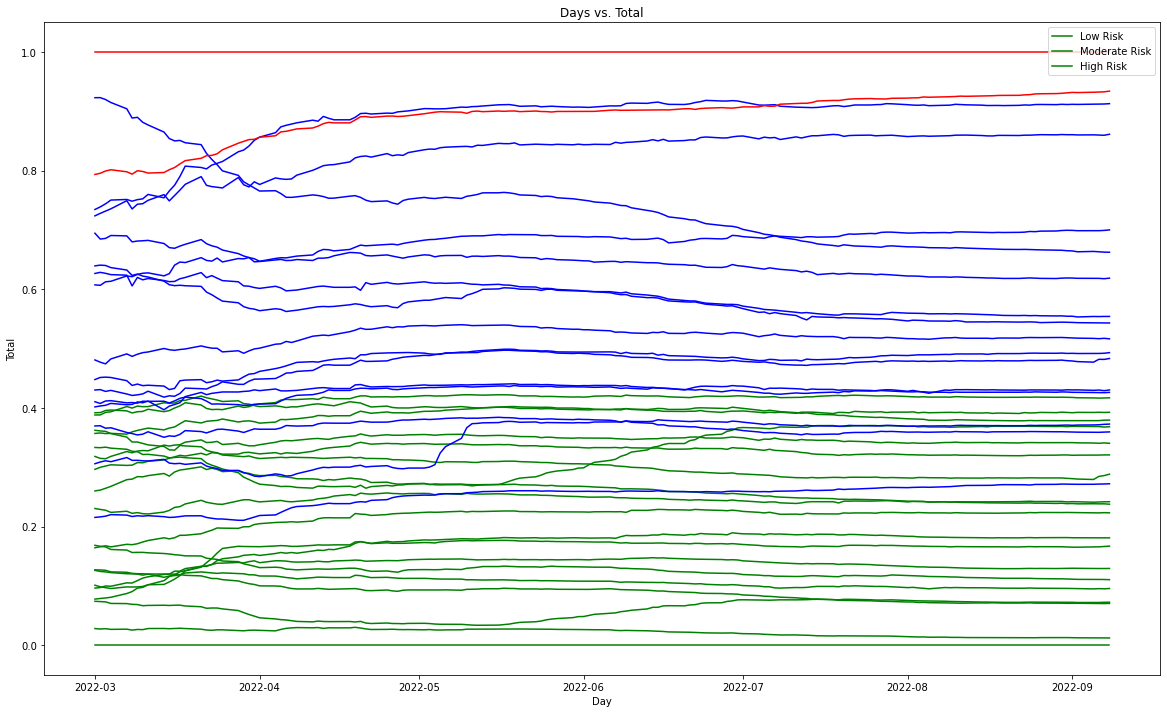

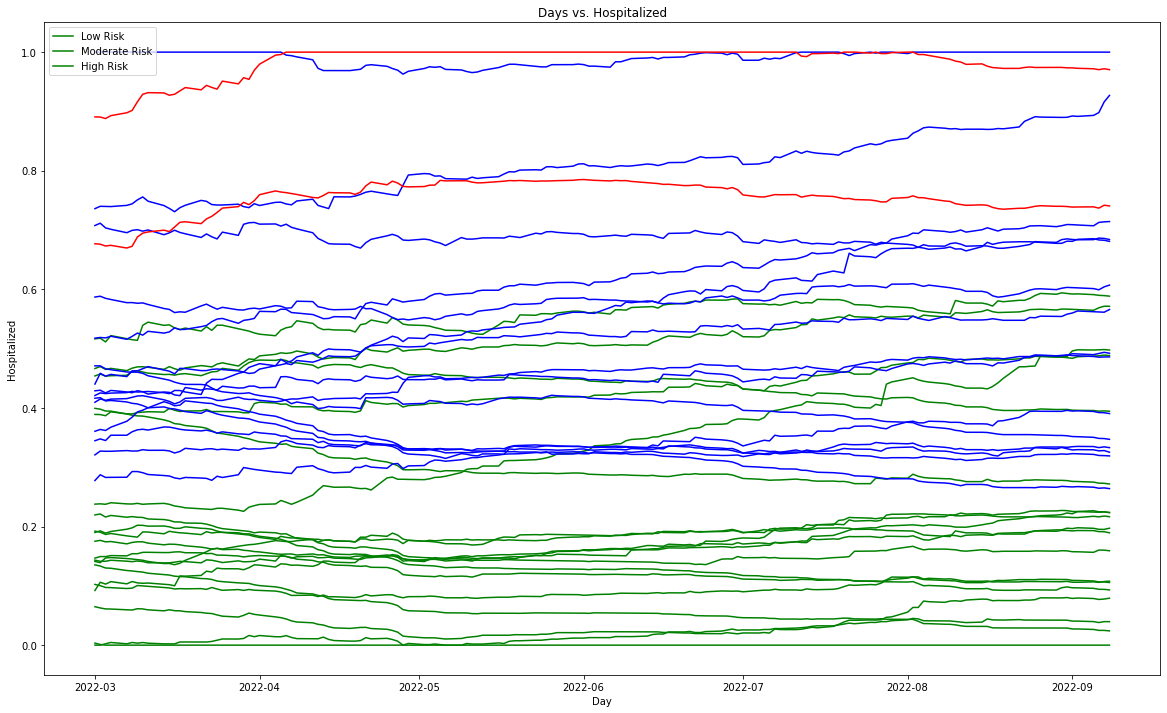

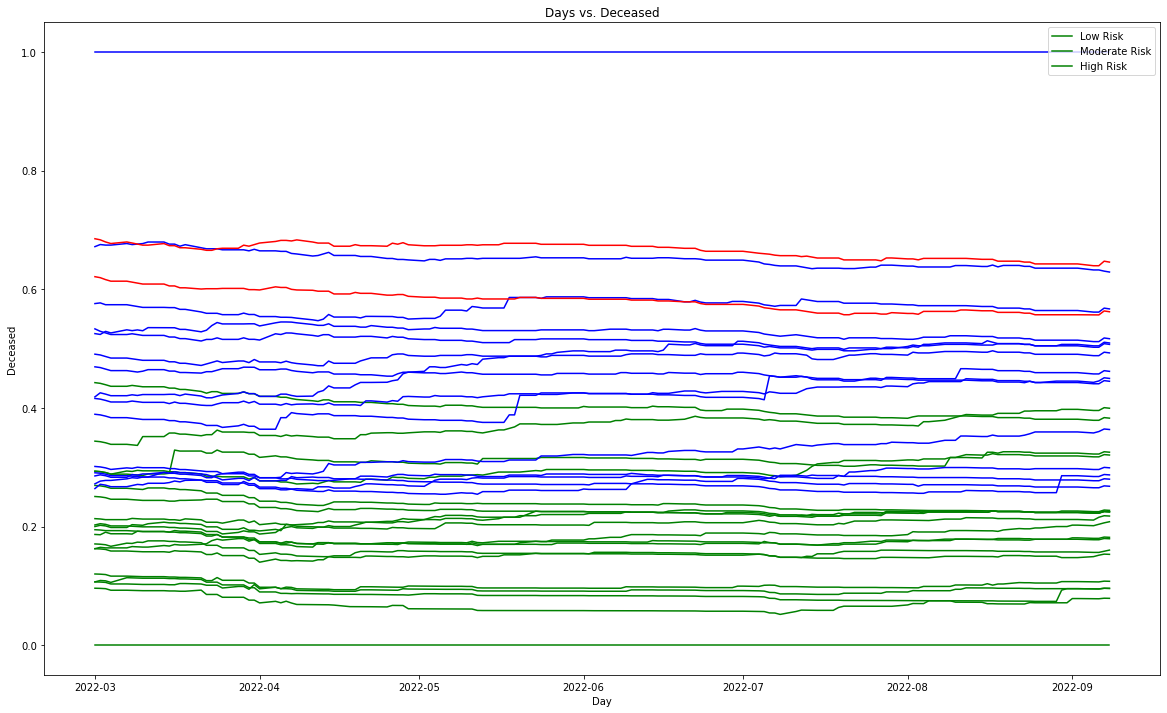

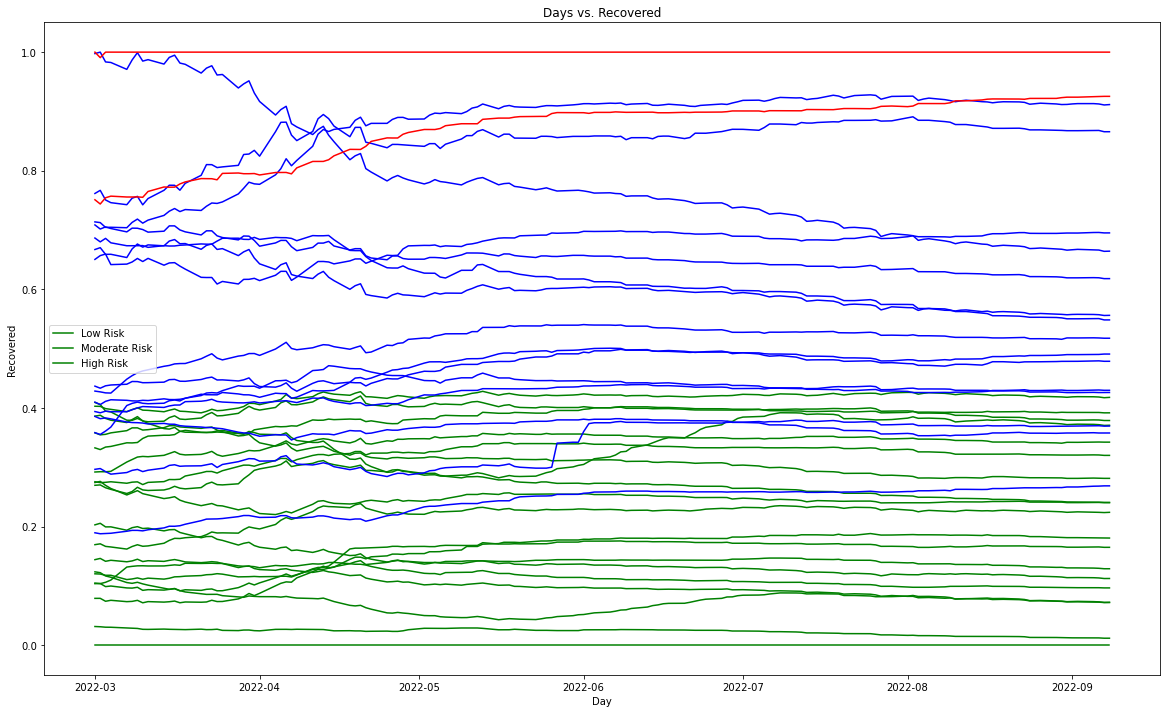

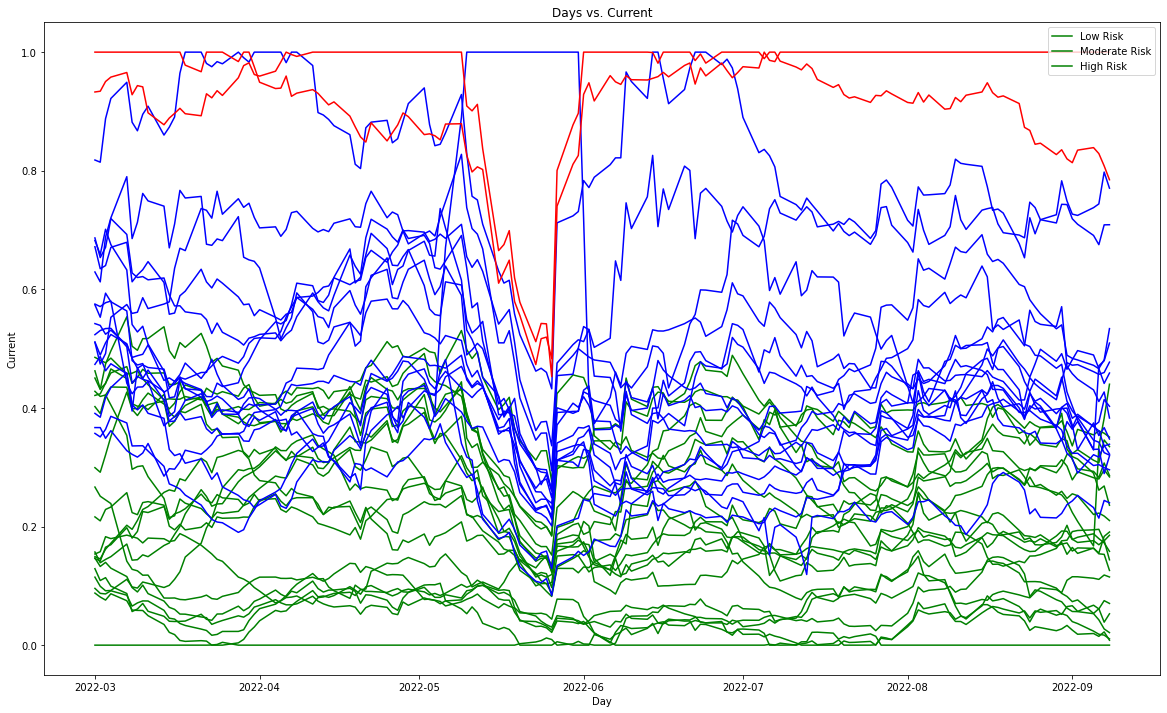

In [37]:
#Plotting different cities(clustered) w.r.t Total and Current Cases
col = ['Total','Hospitalized','Deceased','Recovered','Current']
for c in col:
    plt.figure(figsize=(20, 12))
    for i in zero:
        plt.plot(grp.get_group(i)['date'], grp.get_group(i)[c],color='g')
    for j in one:
        plt.plot(grp.get_group(j)['date'], grp.get_group(j)[c],color='b')
    for k in two:
        plt.plot(grp.get_group(k)['date'], grp.get_group(k)[c],color='r')
    plt.xlabel('Day')
    plt.ylabel(c)
    plt.legend(['Low Risk','Moderate Risk','High Risk'])
    plt.title('Days vs. '+c)
    plt.savefig('NDays vs. '+c+'.jpg')
    plt.show()

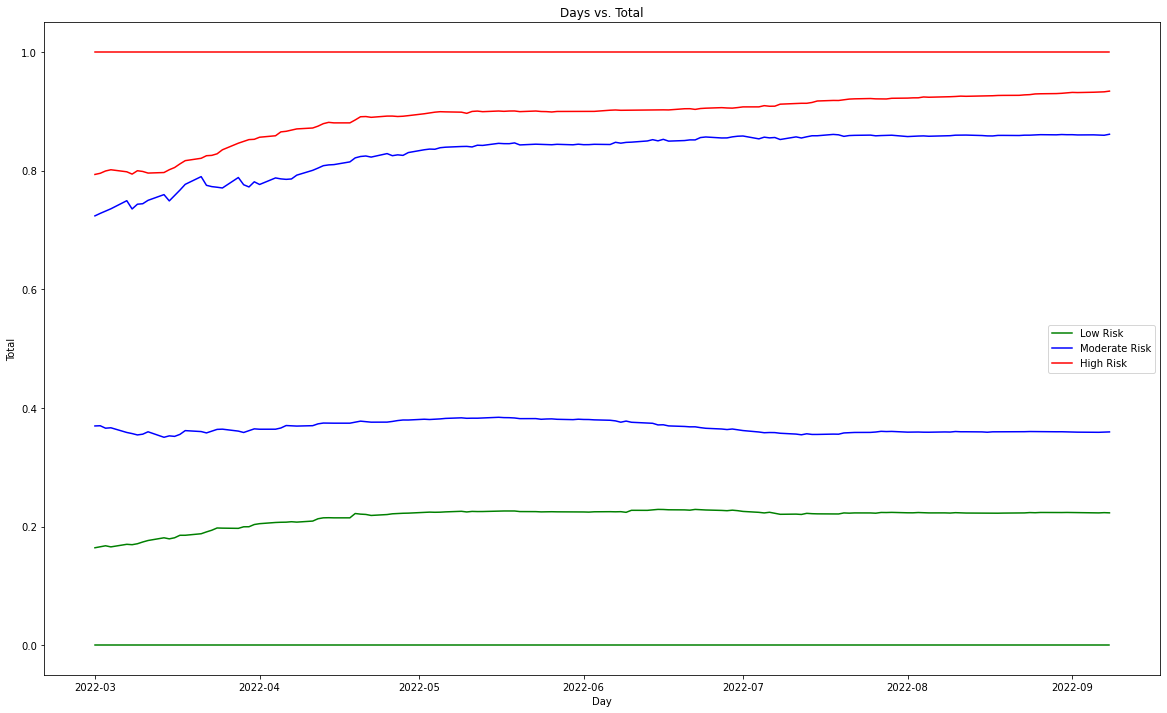

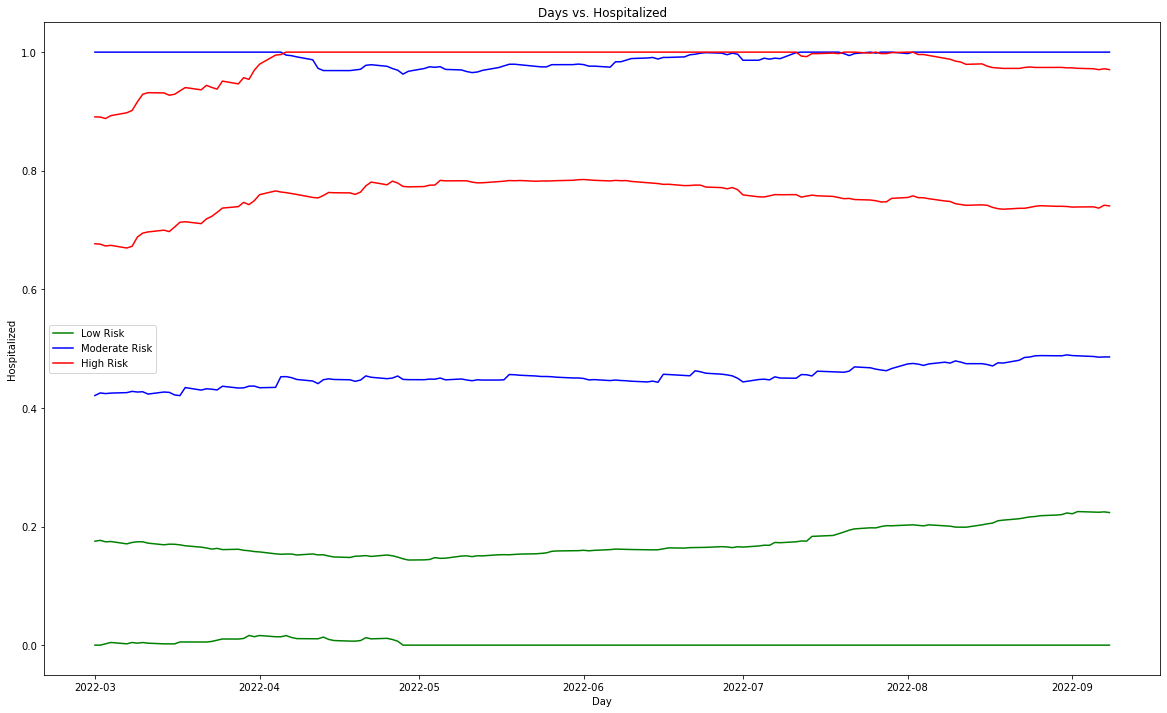

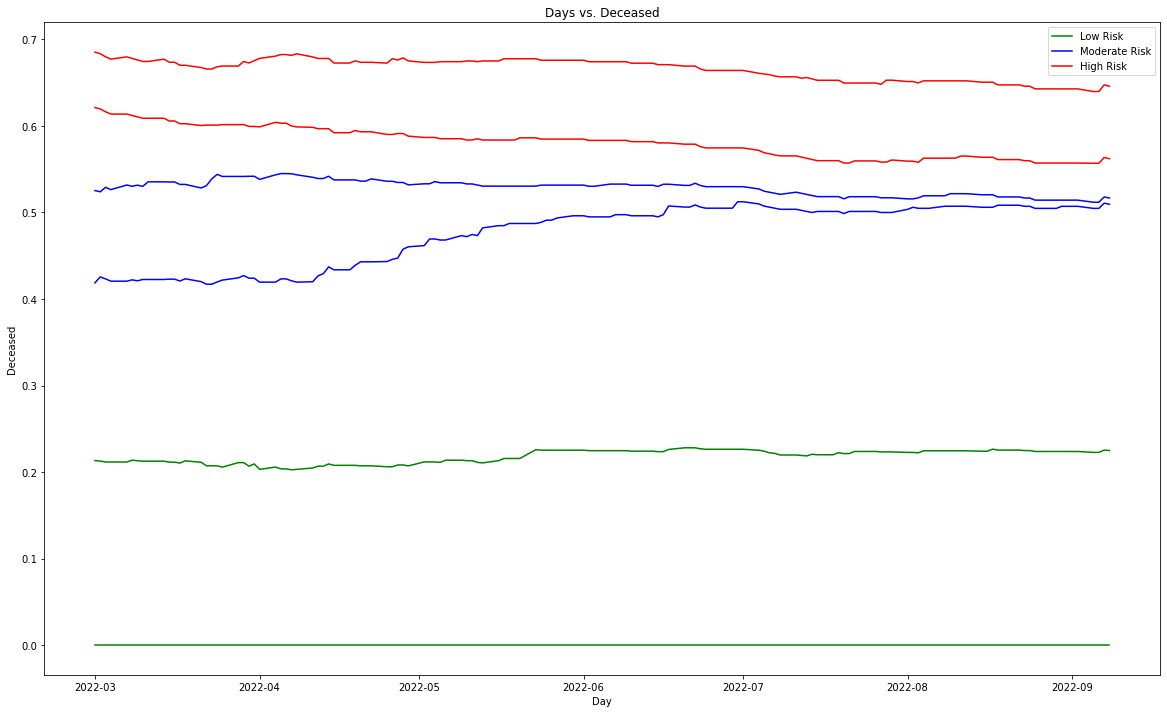

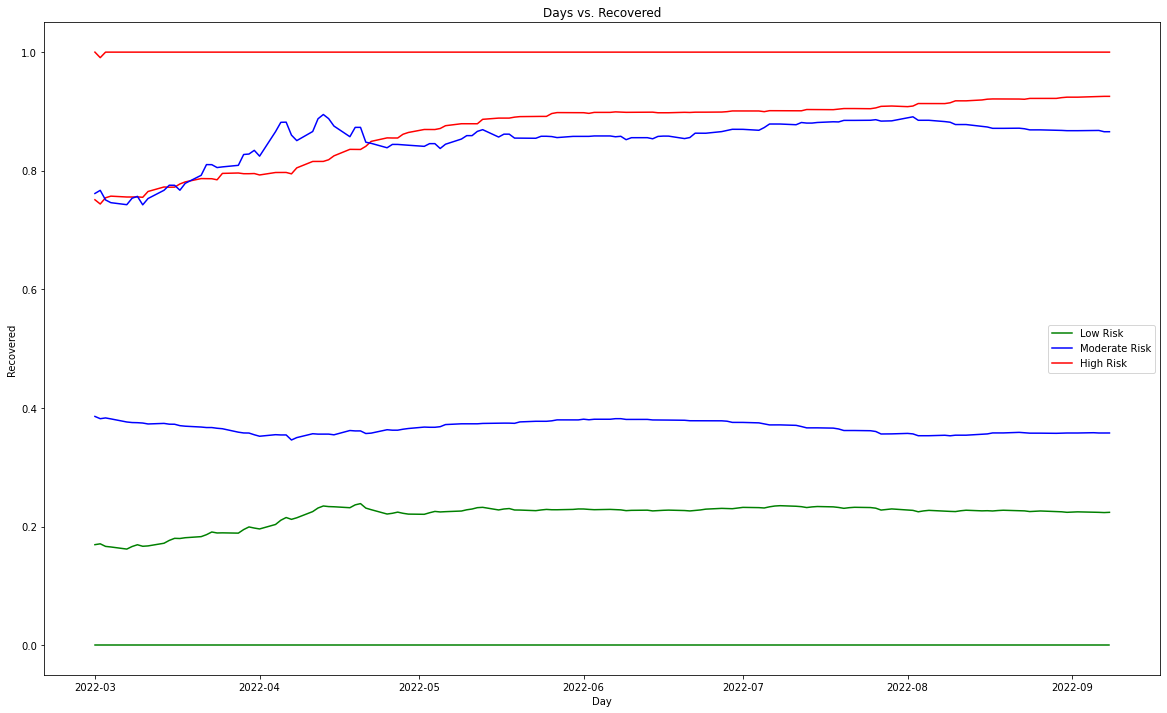

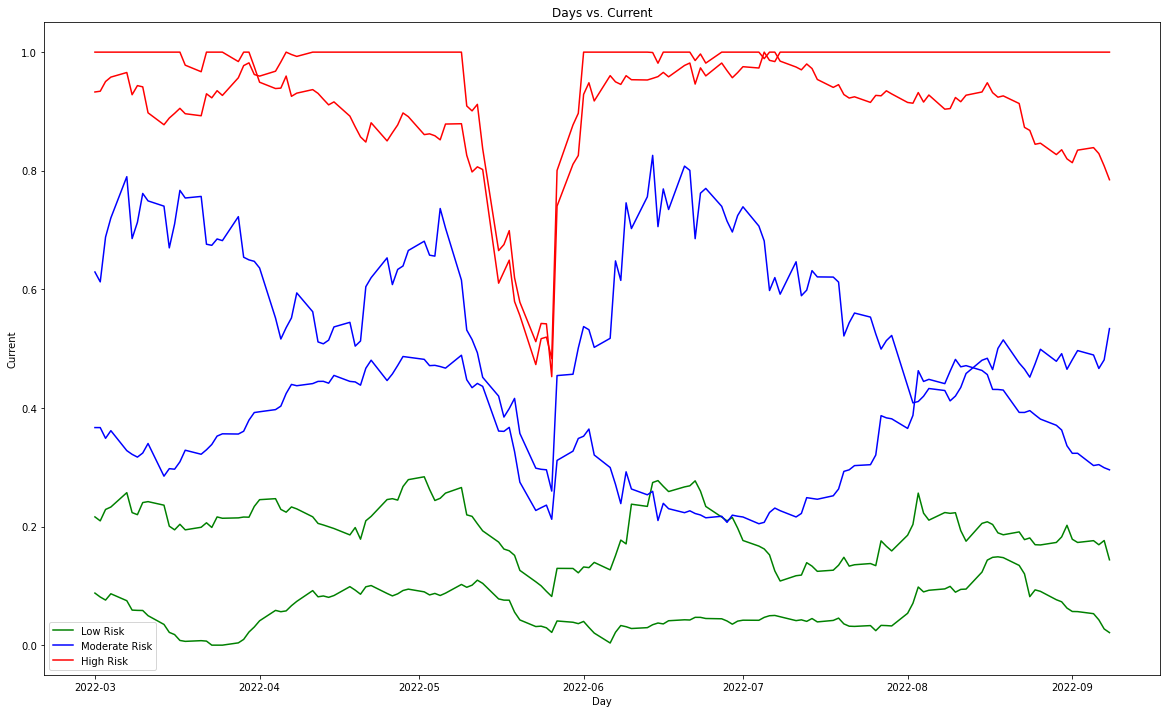

In [38]:
#Plotting different cities(clustered) w.r.t Total and Current Cases
col = ['Total','Hospitalized','Deceased','Recovered','Current']
for c in col:
    plt.figure(figsize=(20, 12))
    for i,j,k in zip(zero,one,two):
        plt.plot(grp.get_group(i)['date'], grp.get_group(i)[c],color='g')
        plt.plot(grp.get_group(j)['date'], grp.get_group(j)[c],color='b')
        plt.plot(grp.get_group(k)['date'], grp.get_group(k)[c],color='r')
    plt.xlabel('Day')
    plt.ylabel(c)
    plt.legend(['Low Risk','Moderate Risk','High Risk'])
    plt.title('Days vs. '+c)
    #plt.savefig('Days vs. '+c+'.jpg')
    plt.show()

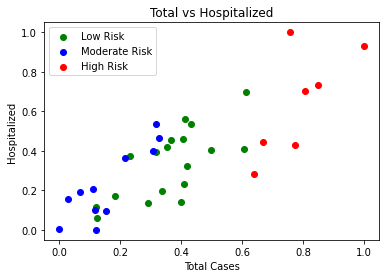

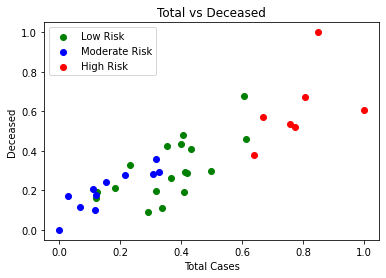

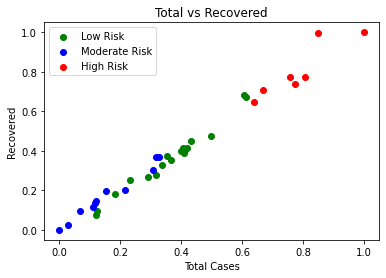

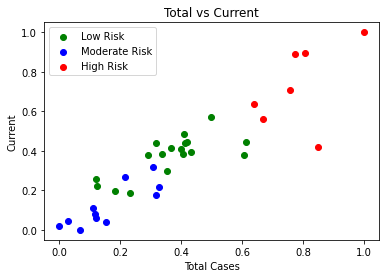

In [39]:
#Plotting Total vs various columns
cols = ['Hospitalized','Deceased','Recovered','Current']
i = random.randrange(len(datasets))
datasets[i]['Cluster'] = cluster[i].labels_
for c in cols:
    groups = datasets[i].groupby(datasets[i]['Cluster'])
    plt.scatter(groups.get_group(0)['Total'], groups.get_group(0)[c], color='g',label ='Low Risk')
    plt.scatter(groups.get_group(1)['Total'], groups.get_group(1)[c], color='b',label = 'Moderate Risk')
    plt.scatter(groups.get_group(2)['Total'], groups.get_group(2)[c], color='r', label = 'High Risk')
    plt.title('Total vs '+c)
    plt.xlabel('Total Cases')
    plt.ylabel(c)
    plt.legend()
    #plt.savefig('Total vs '+c+'.jpg')
    plt.show()

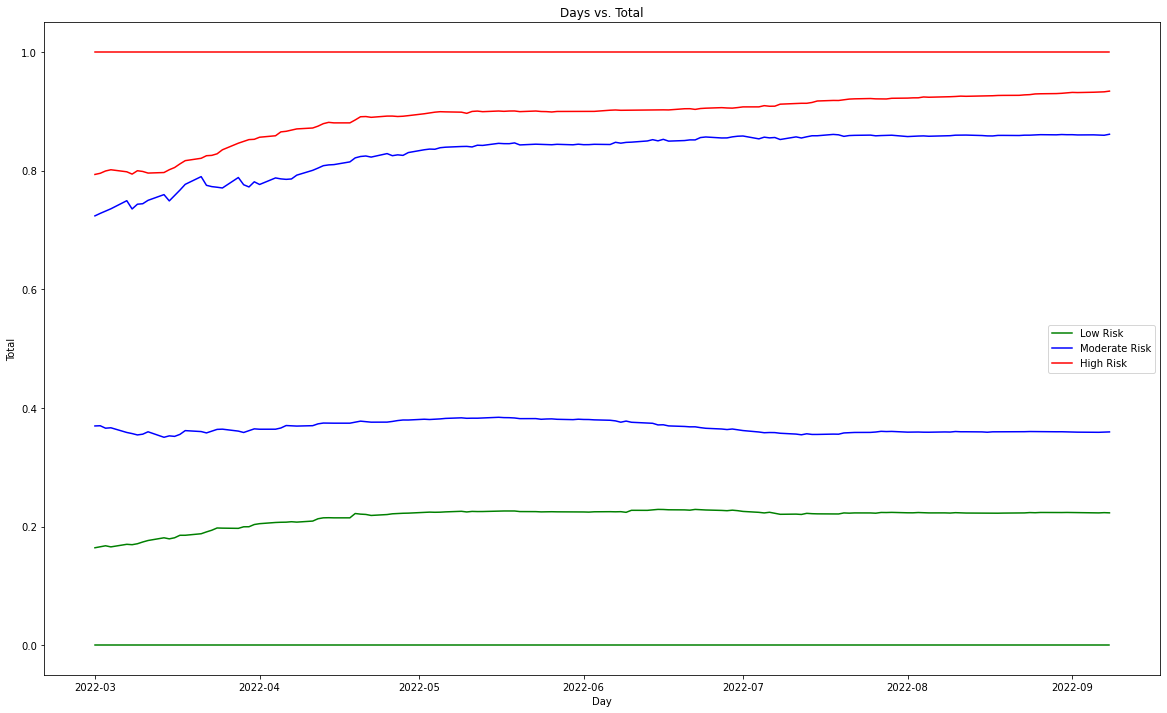

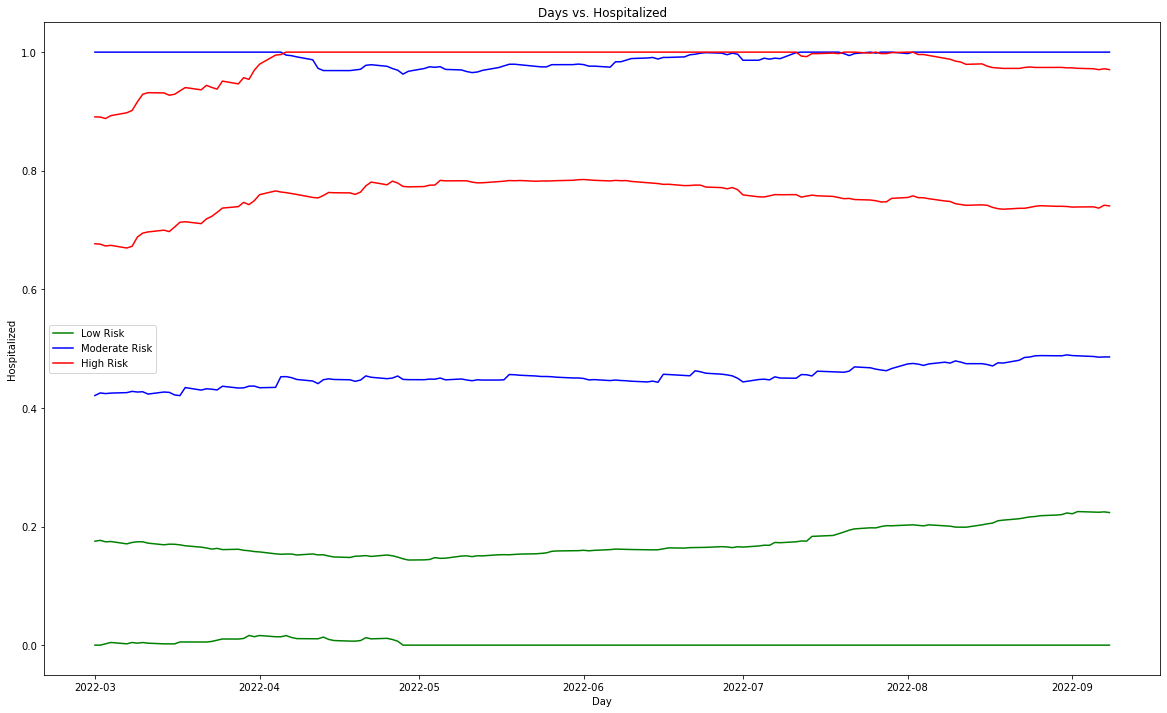

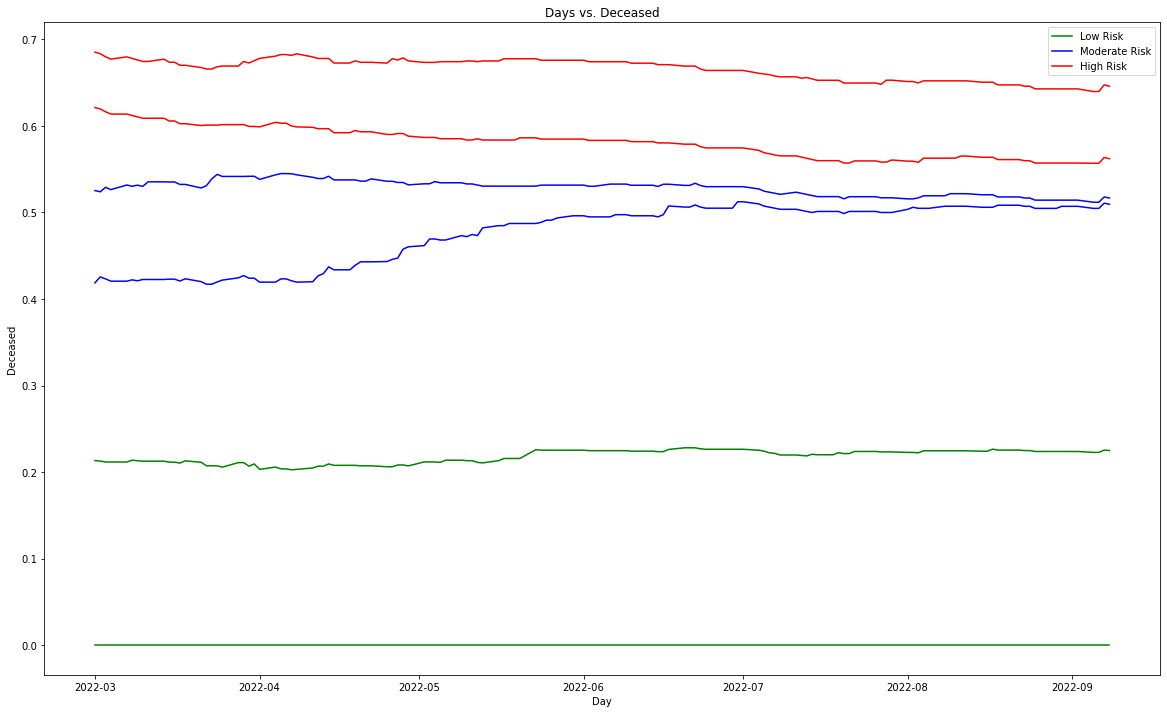

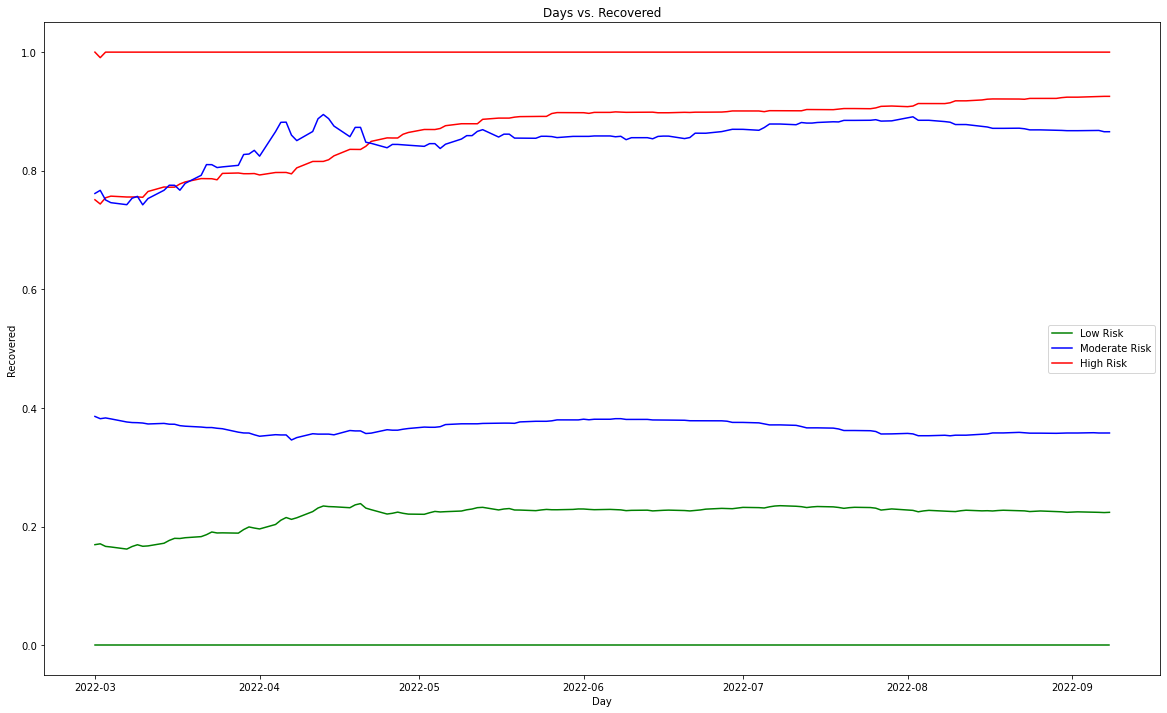

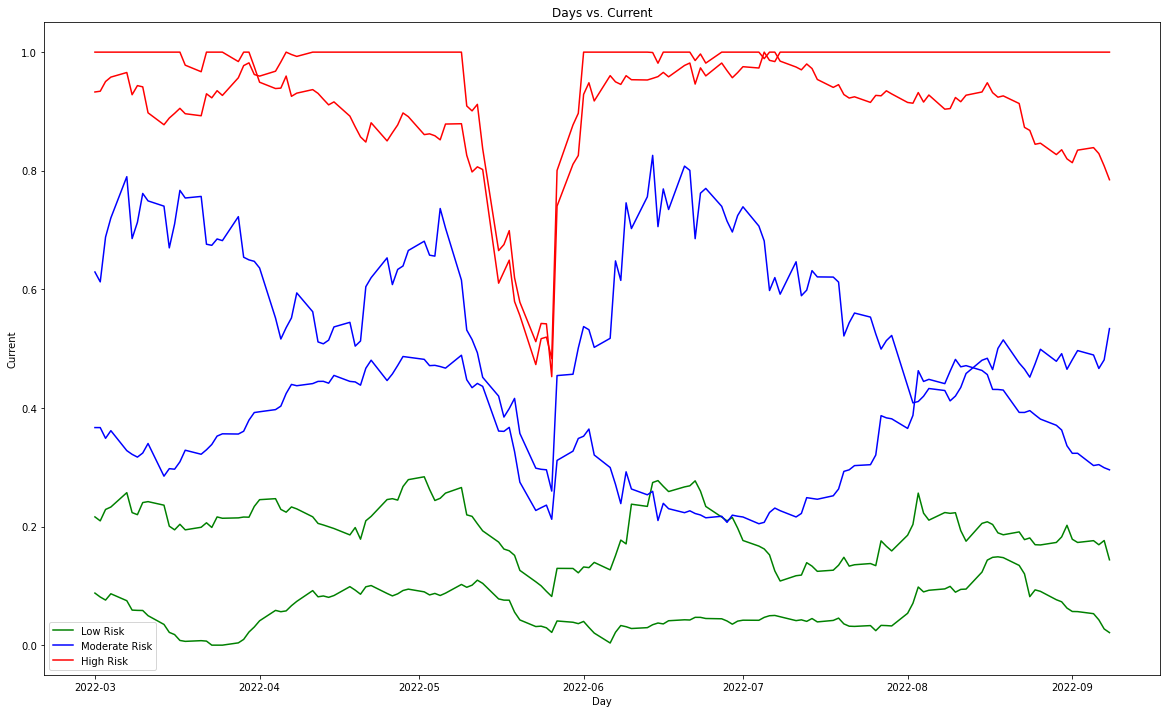

In [40]:
#Plotting different cities(clustered) w.r.t Total and Current Cases
col = ['Total','Hospitalized','Deceased','Recovered','Current']
for c in col:
    plt.figure(figsize=(20, 12))
    for i,j,k in zip(zero,one,two):
        plt.plot(grouped.get_group(i)['date'], grouped.get_group(i)[c],color='g')
        plt.plot(grouped.get_group(j)['date'], grouped.get_group(j)[c],color='b')
        plt.plot(grouped.get_group(k)['date'], grouped.get_group(k)[c],color='r')
    plt.xlabel('Day')
    plt.ylabel(c)
    plt.legend(['Low Risk','Moderate Risk','High Risk'])
    plt.title('Days vs. '+c)
    #plt.savefig('Days vs. '+c+'.jpg')
    plt.show()

In [41]:
print(zero)

{'Donnersbergkreis', 'KS Zweibrücken', 'Südliche Weinstr.', 'Ahrweiler', 'KS Koblenz', 'Kusel', 'KS Neustadt a.d.W.', 'KS Landau i.d.Pf.', 'Bernkastel-Wittlich', 'KS Frankenthal', 'KS Worms', 'Bitburg-Prüm', 'Rhein-Lahn-Kreis', 'KS Trier', 'KS Speyer', 'Cochem-Zell', 'Birkenfeld', 'KS Pirmasens', 'Vulkaneifel'}


In [42]:
dd = pd.DataFrame({
        "Evaluation Metric": ["Silhouette Coefficient", "Calinski-Harabasz Index", "Davies-Bouldin Index"],
        "Value": [statistics.mean(kSil),statistics.mean(kCH),statistics.mean(kDB)]
    })
dd

,Evaluation Metric,Value
0,Silhouette Coefficient,0.566377
1,Calinski-Harabasz Index,59.566472
2,Davies-Bouldin Index,0.632805


In [43]:
print(zero)

{'Donnersbergkreis', 'KS Zweibrücken', 'Südliche Weinstr.', 'Ahrweiler', 'KS Koblenz', 'Kusel', 'KS Neustadt a.d.W.', 'KS Landau i.d.Pf.', 'Bernkastel-Wittlich', 'KS Frankenthal', 'KS Worms', 'Bitburg-Prüm', 'Rhein-Lahn-Kreis', 'KS Trier', 'KS Speyer', 'Cochem-Zell', 'Birkenfeld', 'KS Pirmasens', 'Vulkaneifel'}


In [44]:
print(one)

{'KS Kaiserslautern', 'Westerwaldkreis', 'Bad Dürkheim', 'Kaiserslautern', 'Bad Kreuznach', 'Neuwied', 'Altenkirchen', 'Germersheim', 'KS Ludwigshafen', 'Trier-Saarburg', 'Rhein-Hunsrück', 'Alzey-Worms', 'Südwestpfalz', 'Rhein-Pfalz-Kreis', 'Mayen-Koblenz'}


In [45]:
print(two)

{'Mainz-Bingen', 'KS Mainz'}


In [47]:
zero_d = []
one_d = []
two_d = []
for i in zero:
    zero_d.append(grp.get_group(i))
for j in one:
    one_d.append(grp.get_group(j))
for k in two:
    two_d.append(grp.get_group(k))

In [48]:
zmrg = pd.concat(zero_d)
omrg = pd.concat(one_d)
tmrg = pd.concat(two_d)

In [55]:
len(zmrg)

2622

<AxesSubplot:title={'center':'Total'}, xlabel='date'>

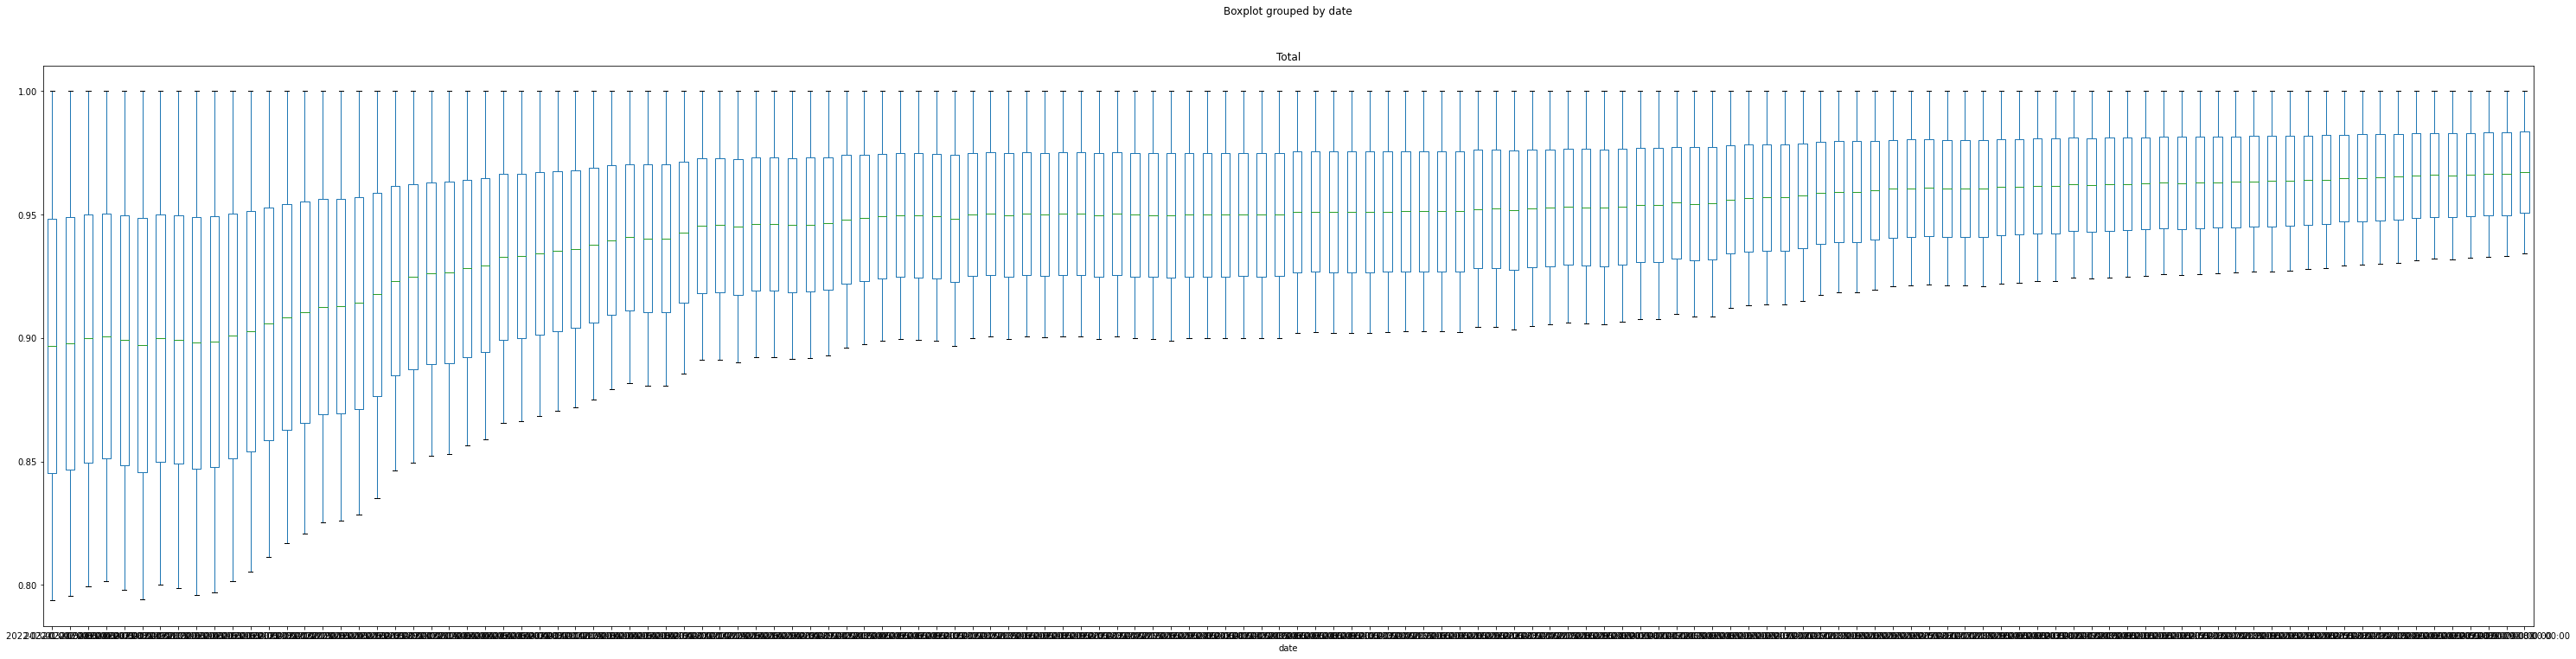

In [62]:
tmrg.boxplot(by ='date', column =['Total'], grid = False,figsize=(50, 12))

<AxesSubplot:title={'center':'Total'}, xlabel='date'>

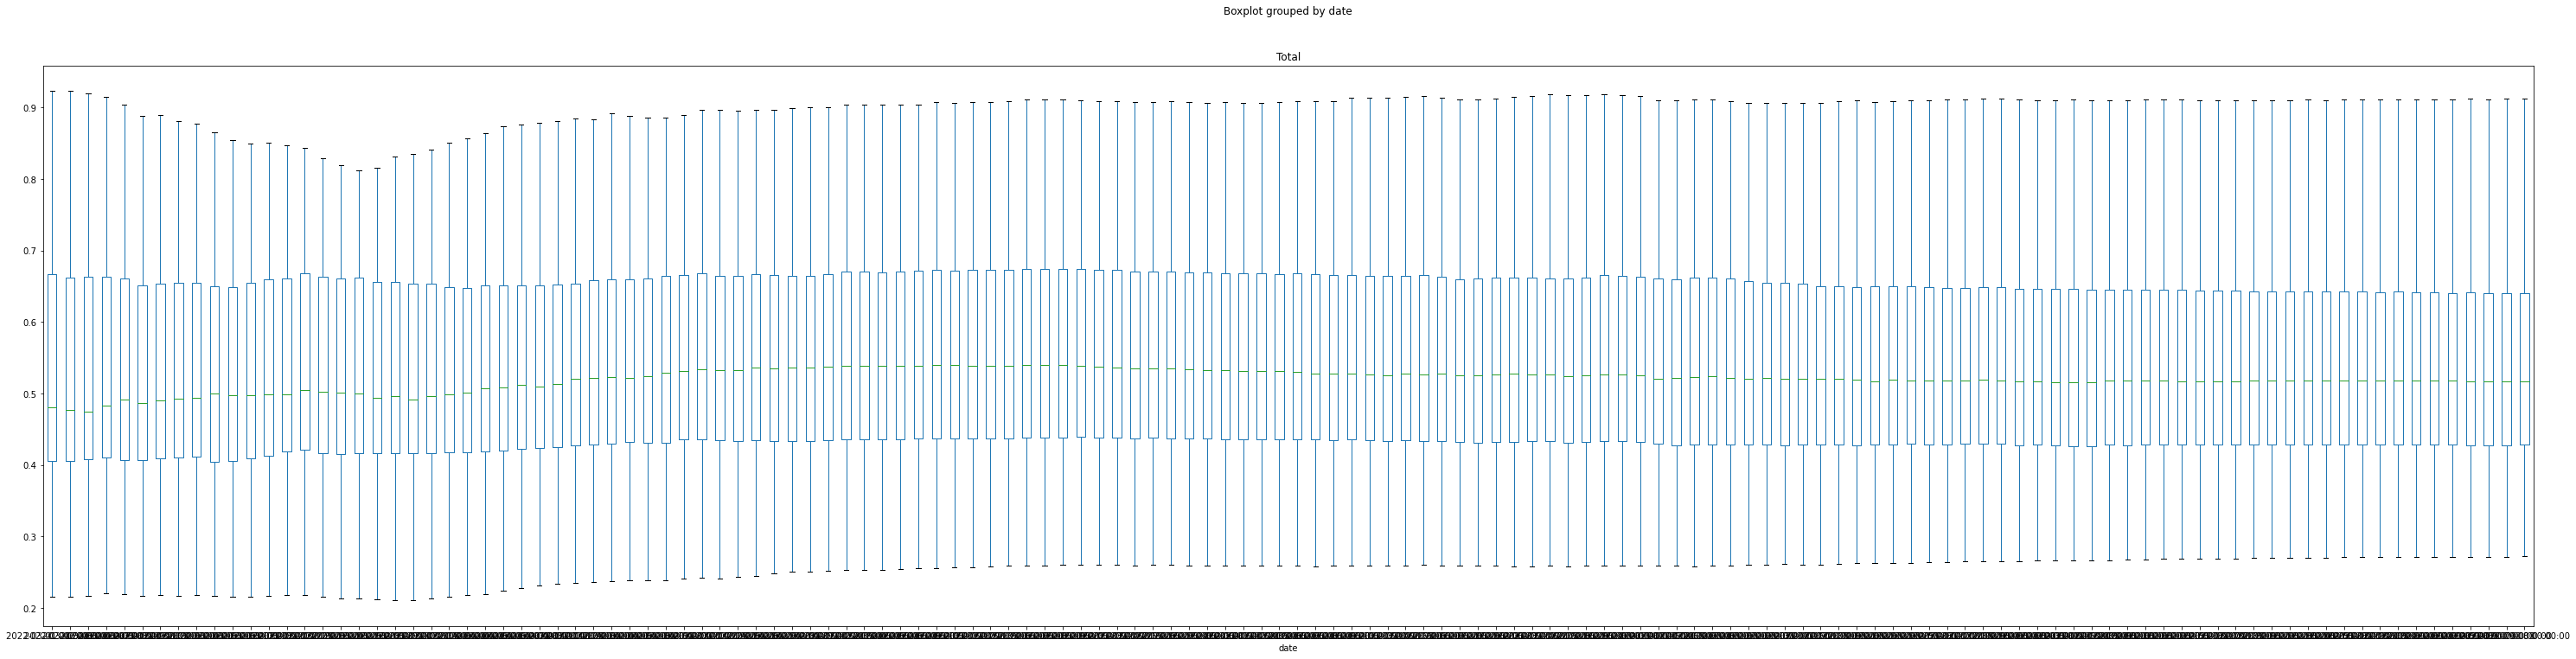

In [63]:
omrg.boxplot(by ='date', column =['Total'], grid = False,figsize=(50, 12))

<AxesSubplot:title={'center':'Total'}, xlabel='date'>

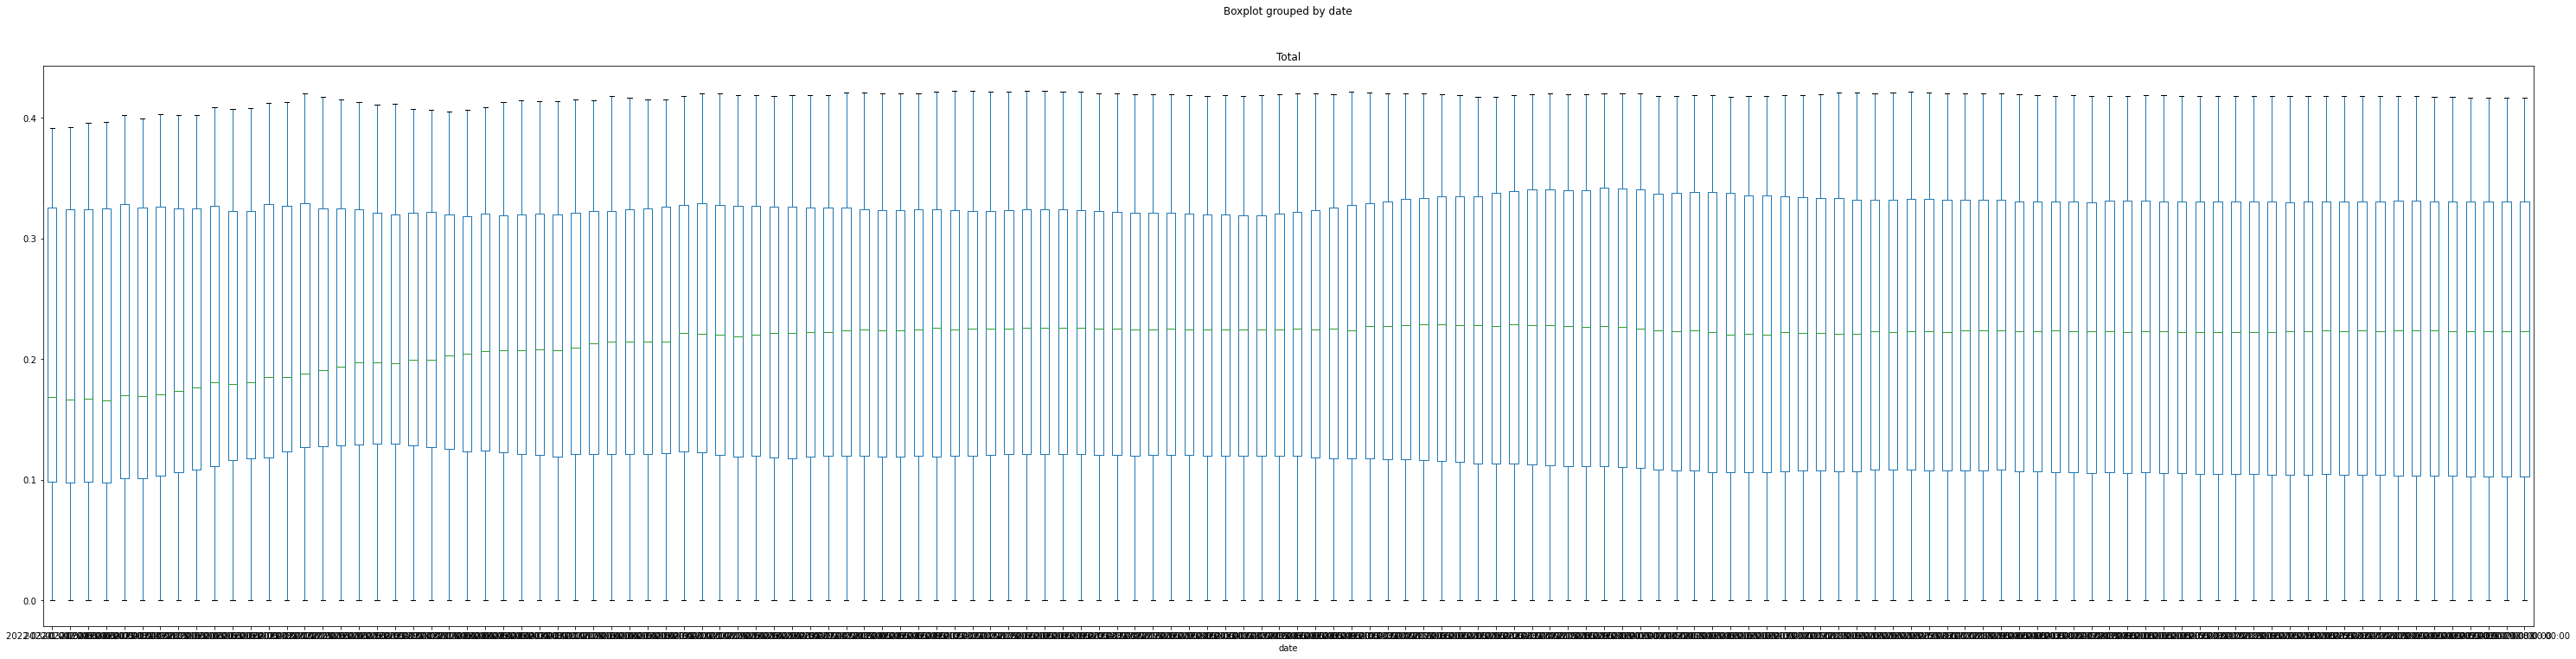

In [65]:
zmrg.boxplot(by ='date', column =['Total'], grid = False,figsize=(50, 12))